## MINI PROJETO 1 | IDENTIFICAÇÃO DE DISTRIBUIÇÕES
#### Lucas Cardoso Fontenla

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import *

O Dataset escolhido, é sobre acidentes de aviões e fatalidades desde 1908. Vou analisar a ocorrência de fatalidades durante esse período. 
A variável é discreta, mas pela quantidade enorme de dados, é possível tratá-las por distribuições de variáveis contínuas.

In [19]:
airplane_crashes = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv', sep=",")

In [20]:
airplane_crashes.head(5)

,﻿Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [21]:
print('Linhas: ', airplane_crashes.shape[0], '\nColunas: ', airplane_crashes.shape[1])

Linhas:  5268 
Colunas:  13


In [22]:
fatalities = airplane_crashes.Fatalities.dropna()
fatalities = fatalities[fatalities > 0]
fatalities.describe()

count    5198.000000
mean       20.292228
std        33.316562
min         1.000000
25%         3.000000
50%         9.000000
75%        23.000000
max       583.000000
Name: Fatalities, dtype: float64

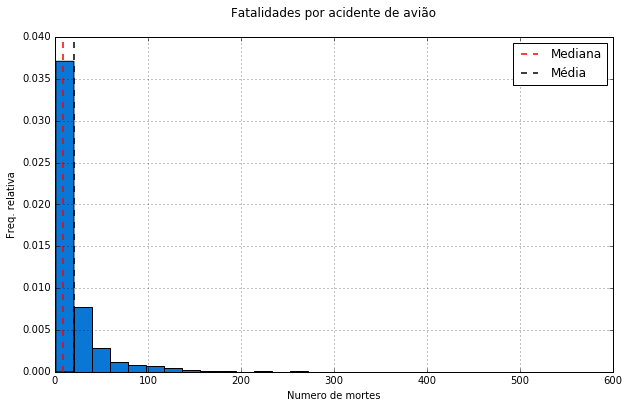

In [23]:
plt.figure(figsize=(10,6))
fatalities.hist(bins=30, normed=True, color='#0A76D5')
plt.axvline(fatalities.median(), lw=1.5, label='Mediana', color='r', ls='dashed')
plt.axvline(fatalities.mean(), lw=1.5, label='Média', color='black', ls='dashed')
plt.title('Fatalidades por acidente de avião\n')
plt.ylabel('Freq. relativa')
plt.xlabel('Numero de mortes')
plt.legend(loc='best')
plt.show()

O histograma acima pode ter três tipos de distribuiçõoes, uma <b>exponencial</b> com a base do número entre 0 e 1, uma <b>Gamma</b> e uma outra <b>distribuição de Erlang</b>. Ambas as funções das distribuições são decrescentes.

C:\Users\4Python\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value array(0.775).
  RuntimeWarning)


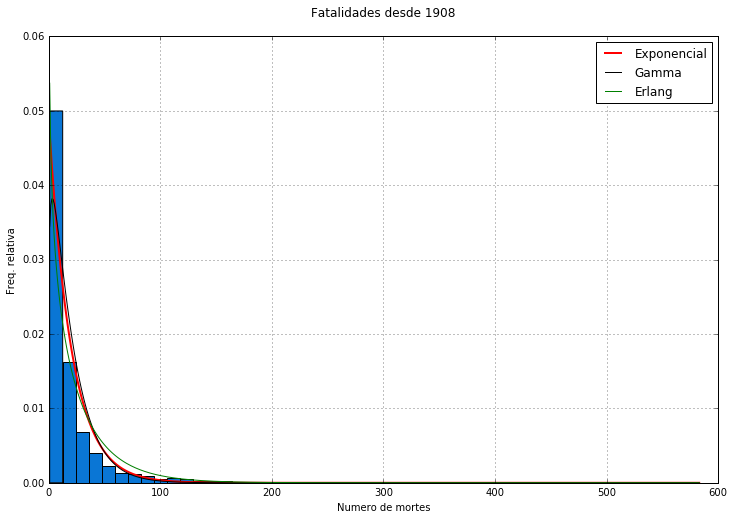

In [24]:
mu = fatalities.mean()
sigma = fatalities.std()
x = sorted(fatalities)

lambda_erlang = .775

k_gamma = 1.2
theta_gamma = fatalities.mean()/k_gamma

plt.figure(figsize=(12,8))
fatalities.hist(bins=50, normed=True, color='#0A76D5')
plt.plot(x, expon.pdf(x, scale=mu), color='red', lw=2, alpha=1, label='Exponencial')
plt.plot(x, gamma.pdf(x, scale=theta_gamma, loc=0, a=k_gamma), color='black', alpha=1, label='Gamma')
plt.plot(x, erlang.pdf(x, a=lambda_erlang, loc=0, scale=sigma), color='green', label='Erlang')
plt.title('Fatalidades desde 1908\n')
plt.ylabel('Freq. relativa')
plt.xlabel('Numero de mortes')
plt.legend(loc='best')
plt.show()

As distribuições escolhidas, de Erlang, Exponencial e Gamma, representam bem os aspectos exponenciais do histograma acima. As constantes foram escolhidas de modo a adequar ao histograma. 

A seleção de constantes mais precisas serão feitas abaixo.

In [48]:
exponencial = expon.fit(fatalities, loc=mu, scale=sigma)
loc_exp = exponencial[0]
scale_exp = exponencial[1]

gamma_line = gamma.fit(fatalities, loc=mu, scale=sigma)
a_gamma = gamma_line[0]
loc_gamma = gamma_line[1]
scale_gamma = gamma_line[2]

erlang_line = erlang.fit(fatalities, lambda_erlang, loc=mu, scale=sigma)
a_erlang = erlang_line[0]
loc_erlang = erlang_line[1]
scale_erlang = erlang_line[2]

C:\Users\4Python\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.77500000000000002.
  RuntimeWarning)
C:\Users\4Python\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.81375000000000008.
  RuntimeWarning)
C:\Users\4Python\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.8008333333333334.
  RuntimeWarning)
C:\Users\4Python\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.81374999999999997.
  RuntimeWarning)
C:\Users\4Python\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2098: RuntimeWarning: The shape pa

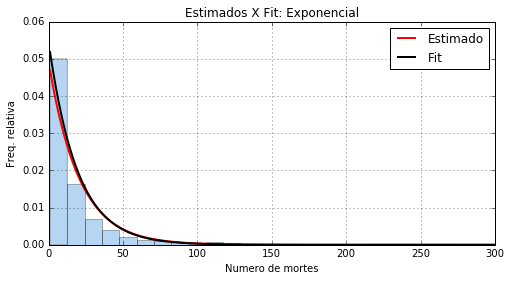

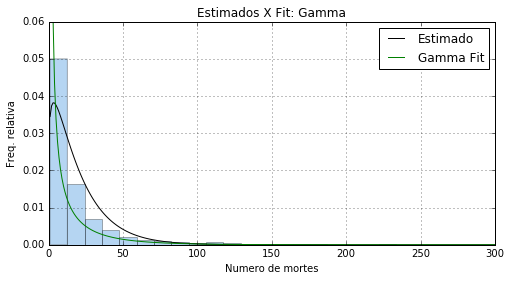

C:\Users\4Python\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value array(0.775).
  RuntimeWarning)
C:\Users\4Python\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value array(0.45438364798018327).
  RuntimeWarning)


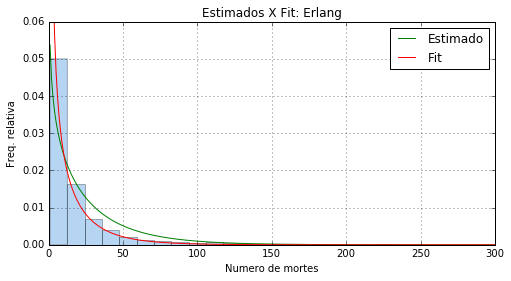

In [49]:
plt.figure(figsize=(8,4))
fatalities.hist(bins=50, normed=True, color='#0A76D5', alpha=0.3)
plt.plot(x, expon.pdf(x, scale=mu), color='red', lw=2, alpha=1, label='Estimado')
plt.plot(x, expon.pdf(x, scale=scale_exp, loc=loc_exp), color='black', lw=2, alpha=1, label='Fit')
plt.ylabel('Freq. relativa')
plt.xlabel('Numero de mortes')
plt.legend(loc='best')
plt.title("Estimados X Fit: Exponencial")
plt.axis([0,300,0,0.06])
plt.show()

plt.figure(figsize=(8,4))
fatalities.hist(bins=50, normed=True, color='#0A76D5', alpha=0.3)
plt.plot(x, gamma.pdf(x, scale=theta_gamma, loc=0, a=k_gamma), color='black', alpha=1, label='Estimado')
plt.plot(x, gamma.pdf(x, scale=scale_gamma, loc=loc_gamma, a=a_gamma), color='green', alpha=1, label='Gamma Fit')
plt.title('Fatalidades desde 1908\n')
plt.ylabel('Freq. relativa')
plt.xlabel('Numero de mortes')
plt.legend(loc='best')
plt.title("Estimados X Fit: Gamma")
plt.axis([0,300,0,0.06])
plt.show()

plt.figure(figsize=(8,4))
fatalities.hist(bins=50, normed=True, color='#0A76D5', alpha=0.3)
plt.plot(x, erlang.pdf(x, a=lambda_erlang, loc=0, scale=sigma), color='green', label='Estimado')
plt.plot(x, erlang.pdf(x, a=a_erlang, loc=loc_erlang, scale=scale_erlang), color='red', label='Fit')
plt.title('Fatalidades desde 1908\n')
plt.ylabel('Freq. relativa')
plt.xlabel('Numero de mortes')
plt.legend(loc='best')
plt.title("Estimados X Fit: Erlang")
plt.axis([0,300,0,0.06])
plt.show()

A Função exponencial é a que mais se aproximam os valores estimados e os obtidos pelo método fit. 
O interessante de notar, é que a exponencial é a única que tem "fim" na ponta da primeira barra do histograma, ou seja, é a única que "está nos padrões" do gráfico. 

Mas, vale lembrar que por ser uma função de probabilidade a área do gráfico deve ser igual a 1, ou seja, a exponencial "corta" a barra e as outras (Erlang e Gamma), cortam uma área menor, dessa maneira, podem ser mais indicadas para os dados selecionados.

Não há como dizer, por hora, qual a mais indicada. Para isso, segue o método Q-Q Plot para identificar as melhores funções.

C:\Users\4Python\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value array(0.45438364798018327).
  RuntimeWarning)


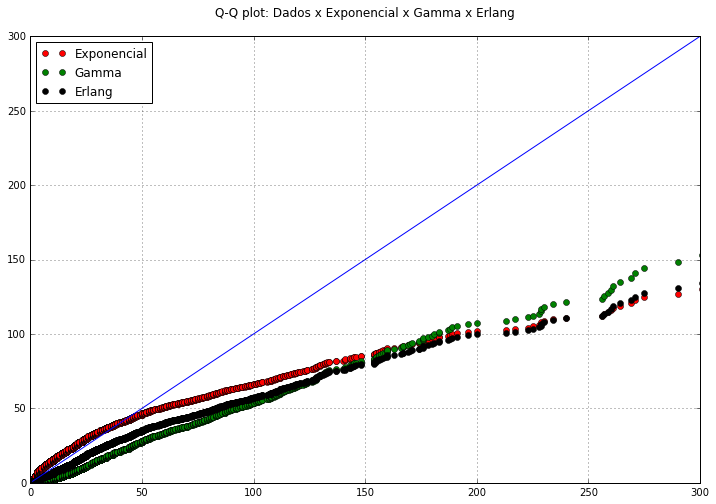

In [50]:
fra = [] # frequencia relativa acumulada
for i in range(len(fatalities)):
    acc = (i - 0.5) / len(fatalities)
    if acc < 0:
        acc = 0
    fra.append(acc) # ver Magalhães e Lima (pag. 195)

# Convertemos fra em uma Series do Pandas
fra = pd.Series(data=fra)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_exp = expon.ppf(fra, scale=scale_exp, loc=loc_exp) # quantis teóricos da exponencial
q_gamma = gamma.ppf(fra, scale=scale_gamma, loc=loc_gamma, a=a_gamma)
q_erlang = erlang.ppf(fra, scale=scale_erlang, loc=loc_erlang, a=a_erlang)

fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Exponencial x Gamma x Erlang\n")

exp_plot, = plt.plot(sorted(fatalities), q_exp, 'o', color="red", label="Exponencial")
gamma_plot, = plt.plot(sorted(fatalities), q_gamma, 'o', color="green", label = "Gamma")
erlang_plot = plt.plot(sorted(fatalities), q_erlang, 'o', color="black", label = "Erlang")

#plt.legend(handles=[exp_plot, gamma_plot])
plt.legend(loc='best')
plt.plot((min(fatalities), max(fatalities)), (min(fatalities), max(fatalities)), '-')

plt.axis([0,300,0,300])
plt.grid()

C:\Users\4Python\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2098: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value array(0.45438364798018327).
  RuntimeWarning)


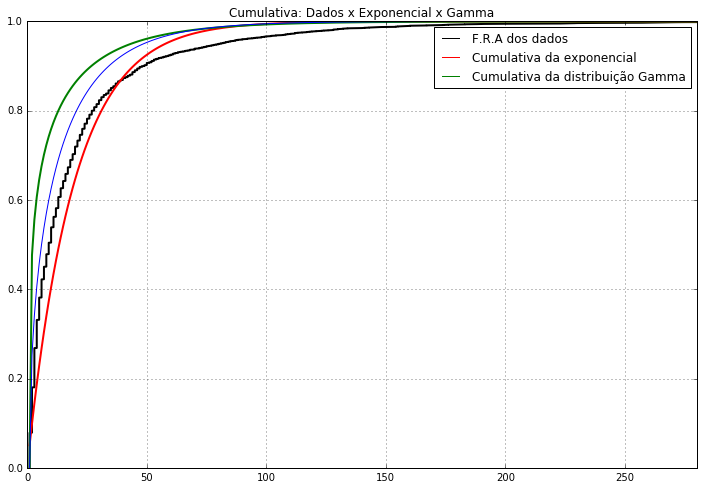

Erro quadrático Dados x Eponencial: 36.25686570120998
Erro quadrático Dados X Gamma: 267.89459853291555
Erro quadrático Dados X Erlang: 43.48091019835503


In [56]:
X = sorted(fatalities)

cdf_exponencial = expon.cdf(X, scale=scale_exp) #FDA
cdf_gamma = gamma.cdf(X, scale=scale_gamma, loc=loc_gamma, a=a_gamma)
cdf_erlang = erlang.cdf(X, scale=scale_erlang, loc=loc_erlang, a=a_erlang)


fig = plt.figure(figsize=(12,8))

plt.title("Cumulativa: Dados x Exponencial x Gamma")

dados_fra_plot, = plt.plot(x, fra, '-', color='black', label="F.R.A dos dados")
cdf_exp_plot,   = plt.plot(X, cdf_exponencial, '-', color='red', label = "Cumulativa da exponencial")
cdf_gamma_plot, = plt.plot(X, cdf_gamma, '-', color='green', label = "Cumulativa da distribuição Gamma")
cdf_erlang_plot, = plt.plot(X, cdf_erlang, '-', color='blue', label = "Cumulativa da distribuição de Erlang")

plt.legend(handles=[dados_fra_plot, cdf_exp_plot, cdf_gamma_plot])
plt.axis([0,280,0,1])
plt.grid()
plt.setp(obj=(dados_fra_plot, cdf_exp_plot, cdf_gamma_plot), lw=2)
plt.show()

print("Erro quadrático Dados x Eponencial: {0}".format(sum((fra - cdf_exponencial)**2)))
print("Erro quadrático Dados X Gamma: {0}".format(sum((fra - cdf_gamma)**2)))
print("Erro quadrático Dados X Erlang: {0}".format(sum((fra - cdf_erlang)**2)))

Segundo a análise dos dados acima, a melhor distribuição de probabilidade que adequa aos dados analisados, é a função exponencial. 
O erro quadrático dessa função é a menor de todas, e empiricamente analisando o gráfico das funções cumutlativas, é nítido que a função exponencial tem uma acumulação de frequência muito próximo dos meus dados reais, ou seja:
1. A melhor função que adequa ao dataset das fatalidades com aviões, é a função exponencial.
2. A segunda melhor é a Erlang, com um erro quadrático pouco maior que a exponencial, mas visualemnte muito distante no gráfico para os valores iniciais.
3. A função gamma não é adequada ao modelo.